## Scikit-Learn API 的特点：

- 接口一致


- 流程通用

### 使用 Scikit-Learn API 进行机器学习的通用流程，

1. 根据具体任务，从 Scikit-Learn 中选择某类模型；


2. 初始化模型的超参数；


3. 从数据中提取`特征数据`和`目标向量`；


4. 将数据划分为训练集和测试集；


5. 通过调用 ``fit()`` 方法来训练模型以拟合训练集数据。


6. 将模型应用到测试集或者新的数据（Apply the Model to new data）:

   - 对于监督学习，我们一般是使用 ``predict()`` 方法来预测新数据的目标值。
      
   - 对于非监督学习, 我们一般使用 ``transform()`` 或者 ``predict()`` 方法来变换或预测数据的某些特证。

下面通过例子来介绍一下监督学习和非监督学习。

### 对上面 fit 的解释

在科学和工程问题中，通过采样、实验等方法可以获得一批离散数据。

- 我们希望获得数据背后潜在的连续函数（比如曲线），


- 或者更加密集的离散方程与已知数据相吻合，

以上过程就叫做拟合 fitting。

#### 举个栗子说明

下面左边图形中黑色点是一批采样点，我们希望用红色的曲线去表示它，实际上就是右边所示的找一个函数 $f(x)$ 去拟合这些点 $(x_i,y_i)$。

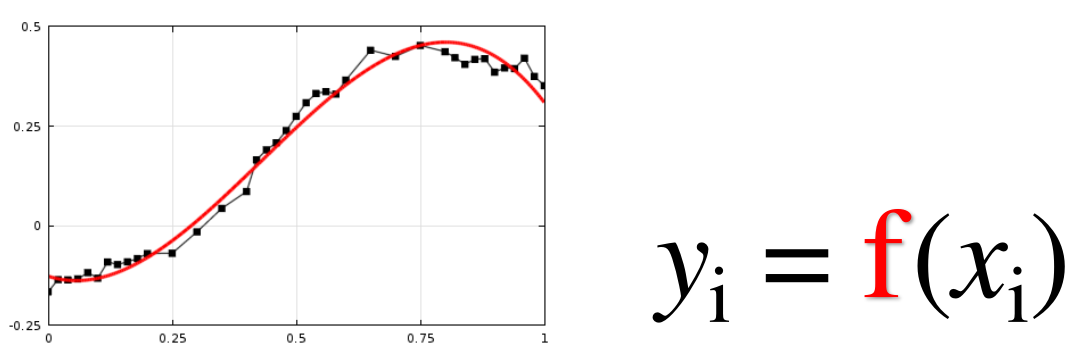

## 例子中体验整个流程

### 监督学习举例: 简单的线性回归

- 用直线拟合数据 $(x, y)$，


- 这里先构造一些二维点。

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [15]:
plt.rcParams['figure.figsize'] = (8,5)

rng = np.random.RandomState(58)
x = 10 * rng.rand(50)
y = 2 * x - 3 + rng.randn(50)

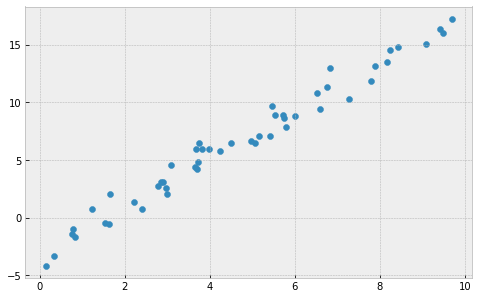

In [16]:
# 绘制散点图
plt.scatter(x, y);

In [4]:
print(x.shape, y.shape)

(50,) (50,)


Scikit-Learn 机器学习算法的总体流程如下：

- 设定`超参数`指定具体的模型；


- 使用 fit() 训练模型，即将模型应用到数据上，得到`模型自己的参数`；


- 用训练好的模型`预测新的数据`。

#### 1. 选择一类模型

这里选择线性回归模型（linear regression model）, 我们导入线性回归类（linear regression class）:

In [5]:
from sklearn.linear_model import LinearRegression

#### 2. 设定模型超参数 model hyperparameters

第 1 步只确定了哪一类模型，但一类模型中怎么样的模型还涉及到一些参数，它们不是通过训练而得，需要人来设定。

比如选好线性回归模型后，我们需要设定:

- 截距是否等于 0？


- 通过设置对应的超参数 ``fit_intercept``。

我们先看 ``fit_intercept=True`` 的效果。

In [6]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

通过实例化模型，相当于只是设定了超参数，我们还需要将模型应用到数据上。

#### 3. 将数据表示成特征矩阵和目标向量（features matrix and target vector）

上述 ``y`` 已经是目标向量了，但是数据 ``x`` 还需要转化为矩阵形式 ``[n_samples, n_features]``，这里 ``n_features=1``:

In [7]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. 训练模型（Fit the model to your data）

将模型应用到数据上，scikit-learn 是通过调用 ``fit()``:

In [8]:
model.fit(X, y)

LinearRegression()

``fit()`` 执行以后，我们就获得了模型的内部参数。下面我们来查看一下相关模型训练好的成员变量，这些变量一般以下划线结尾:

In [9]:
model.coef_

array([2.05260999])

In [10]:
model.intercept_

-3.009247819192372

这两个参数分别表示什么呢？
观察真实值的误差。


#### 5. 预测新数据

这里先给新数据赋值并转化为相应的特征矩阵:

In [11]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [12]:
# 构造测试特征矩阵
Xfit = xfit[:, np.newaxis]

# 获得预测结果
yfit = model.predict(Xfit)

现在我们将原始数据和训练出来的模型绘制出来:

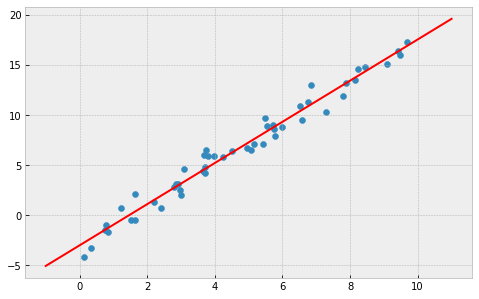

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');

如果将截距设为 0 会怎么呢？ 即 ``fit_intercept=False``。

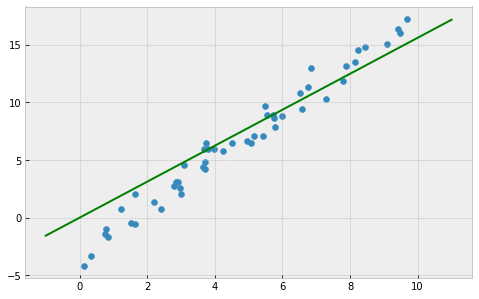

In [18]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# 获得预测结果
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='g');

通常，通过将某个模型的结果与一些已知的基准进行比较来评估该模型的有效性，我们将在下一个示例中看到这一点。